In [22]:
# -*- coding: utf-8 -*-
"""
https://blog.csdn.net/qq_15642411/article/details/79717431
"""
import numpy as np
import cv2
from skimage.morphology import remove_small_objects
import matplotlib.pyplot as plt

In [19]:
im1=cv2.imread(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\category\1\22.png')
b,g,r=np.double(cv2.split(im1))
shadow_ratio = (4/np.pi)*np.arctan2((b-g),(b+g)) #mutiply 4/pi is to ensure value[0,1]
shadow_mask=shadow_ratio>0.1
#cv2.imshow("shadow_mask",np.uint8(shadow_mask*255))
shadow_mask[:5,:]=0
shadow_mask[-5:,:]=0
shadow_mask[:,:5]=0
shadow_mask[:,-5:]=0#边界上的值=0
#cv2.imshow("shadow_mask1",np.uint8(shadow_mask*255))
shadow_mask=remove_small_objects(shadow_mask, min_size=100, connectivity=3)
# opencv 中没有matlab 中类似bwareaopen的函数，二值图像面积开运算
# cv2.imshow("shadow_mask1",np.uint8(shadow_mask*255))

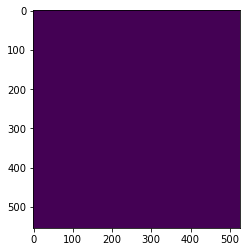

In [20]:
plt.imshow(shadow_mask)

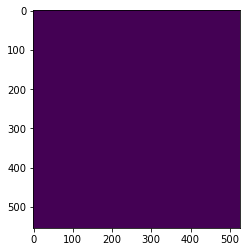

In [21]:
plt.imshow(np.uint8(shadow_mask*255))

In [5]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel[1,0]=0
kernel[3,0]=0
kernel[1,4]=0
kernel[3,4]=0
shadow_mask1=np.uint8(shadow_mask*1)
mask=cv2.dilate(shadow_mask1,kernel)-shadow_mask1
#cv2.imshow("boundary",np.uint8(mask*255))
#substarct shadow_mask is to get boundary
#get boundary
[row,col]=np.where(mask==1)
#for i in range(len(row)-1):
#    cv2.line(im1,(col[i],row[i]),(col[i+1],row[i+1]),(0,0,255),1)
im1[row,col,:]=im1[40,40,:]

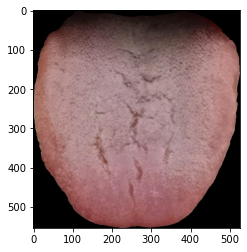

In [6]:
plt.imshow(im1[:,:,::-1])

Text(0.5, 1.0, 'V(value)')

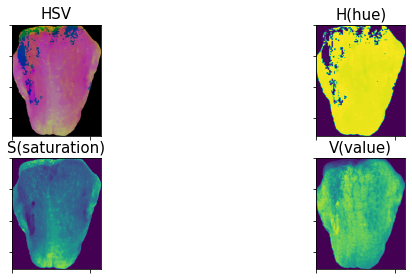

In [9]:
import cv2
"""
https://blog.csdn.net/weixin_42228166/article/details/124532200?spm=1001.2101.3001.6650.5&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7Edefault-5-124532200-blog-94407908.pc_relevant_aa&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromBaidu%7Edefault-5-124532200-blog-94407908.pc_relevant_aa&utm_relevant_index=10
"""
image = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data3\category\4\306.png'
img = cv2.imread(image)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#转为灰度图
img_hsv =cv2.cvtColor(img,cv2.COLOR_BGR2HSV)#转换为HSV三通道图像
H,S,V=cv2.split(img_hsv)#将三通道分开
plt.figure(figsize=(10,4.5))
fs = 15
plt.subplot(2,2,1)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(img_hsv,cmap='hsv')
plt.title('HSV', fontsize=fs)
plt.subplot(2,2,2)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(H)
plt.title('H(hue)', fontsize=fs)
plt.subplot(2,2,3)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(S)
plt.title('S(saturation)', fontsize=fs)
plt.subplot(2,2,4)
plt.tick_params(labelbottom=False, labelleft=False)
plt.imshow(V)
plt.title('V(value)', fontsize=fs)

In [255]:
H

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
m = double(((s - v) / (h + s + v)))
img_nos=np.where(m,255,img_gray)#阴影部分像素转为255，其他为灰度值

NameError: name 'double' is not defined

In [37]:
import cv2
import numpy as np

In [23]:
def max_filter(image,filter_size):
    # padding操作，在最大滤波中需要在原图像周围填充（filter_size//2）个小的数字，一般取-1
    # 先生成一个全为-1的矩阵，大小和padding后的图像相同
    empty_image = np.full((image.shape[0] + (filter_size // 2) * 2, image.shape[1] + (filter_size // 2) * 2), -1)
    # 将原图像填充进矩阵
    empty_image[(filter_size // 2):empty_image.shape[0] - (filter_size // 2),
    (filter_size // 2):empty_image.shape[1] - (filter_size // 2)] = image.copy()
    # 创建结果矩阵，和原图像大小相同
    result = np.full((image.shape[0], image.shape[1]), -1)

    # 遍历原图像中的每个像素点，对于点，选取其周围（filter_size*filter_size）个像素中的最大值，作为结果矩阵中的对应位置值
    for h in range(filter_size // 2, empty_image.shape[0]-filter_size // 2):
        for w in range(filter_size // 2, empty_image.shape[1]-filter_size // 2):
            filter = empty_image[h - (filter_size // 2):h + (filter_size // 2) + 1,
                     w - (filter_size // 2):w + (filter_size // 2) + 1]
            result[h-filter_size // 2, w-filter_size // 2] = np.amax(filter)
    return result

In [24]:
def min_filter(image,filter_size):
    # padding操作，在最大滤波中需要在原图像周围填充（filter_size//2）个大的数字，一般取大于255的
    # 先生成一个全为-1的矩阵，大小和padding后的图像相同
    empty_image = np.full((image.shape[0] + (filter_size // 2) * 2, image.shape[1] + (filter_size // 2) * 2), 400)
    # 将原图像填充进矩阵
    empty_image[(filter_size // 2):empty_image.shape[0] - (filter_size // 2),
    (filter_size // 2):empty_image.shape[1] - (filter_size // 2)] = image.copy()
    # 创建结果矩阵，和原图像大小相同
    result = np.full((image.shape[0], image.shape[1]), 400)

    # 遍历原图像中的每个像素点，对于点，选取其周围（filter_size*filter_size）个像素中的最小值，作为结果矩阵中的对应位置值
    for h in range(filter_size // 2, empty_image.shape[0]-filter_size // 2):
        for w in range(filter_size // 2, empty_image.shape[1]-filter_size // 2):
            filter = empty_image[h - (filter_size // 2):h + (filter_size // 2) + 1,
                     w - (filter_size // 2):w + (filter_size // 2) + 1]
            result[h-filter_size // 2, w-filter_size // 2] = np.amin(filter)
    return result


In [25]:
#B is the filtered image and I is the original image
def background_subtraction(I, B):
    O = I - B
    norm_img = cv2.normalize(O, None, 0,255, norm_type=cv2.NORM_MINMAX)
    return norm_img

In [26]:
def remove_shadow(image_path):
    image = cv2.imread(image_path, 0)

    max_result=max_filter(image,30)
    min_result=min_filter(max_result,30)
    result=image-min_result
    result=cv2.normalize(result, None, 0, 255, norm_type=cv2.NORM_MINMAX)
    return result


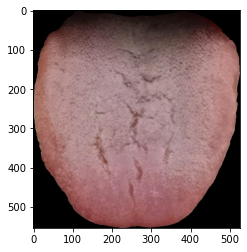

In [27]:
im1=cv2.imread(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\category\1\22.png')
plt.imshow(im1[:,:,::-1])

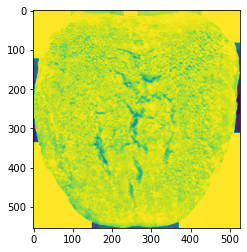

In [32]:
result=remove_shadow(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\category\1\22.png')
plt.imshow(result)

In [31]:
result.shape

(554, 527)

In [1]:
import numpy as np
import cv2 as cv
from skimage.morphology import remove_small_objects
import matplotlib.pyplot as plt

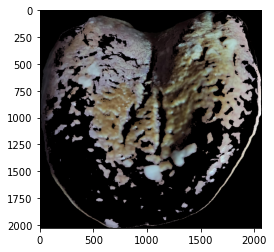

In [15]:
img = cv.imread(r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data_coated\category\3\20220607152458-1seg.png')
plt.imshow(img[:,:,::-1])

In [16]:
def mean_value(arr):
    """ 计算非零元素均值"""
    exist = (arr != 0)
    return arr.sum()/exist.sum()

In [17]:
lst = []
for i in range(img.shape[0]):
    # if np.any(img[i,:, :]):
    lst.append(mean_value(img[i,:,:]))

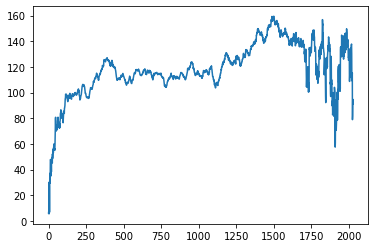

In [18]:
plt.plot(lst)